## Decision tree - ID3

In [295]:
import pandas as pd
import numpy as np

In [296]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [297]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [299]:
data.shape

(768, 9)

In [300]:
X = data.iloc[:,1:8]
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [301]:
Y = data.iloc[:,-1]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Decision Tree

In [302]:
from collections import Counter
import math

def ganancia_info(x):
    ganancia_info = 0
    return ganancia_info

def entropia(lista):
    # Calcula la frecuencia de cada clase en la lista
    frecuencias = Counter(lista)
    # Calcula la proporción de cada clase
    proporciones = [frecuencia / len(lista) for frecuencia in frecuencias.values()]
    # Calcula la entropía
    entropia = -sum(p * math.log2(p) for p in proporciones if p > 0)
    return entropia

In [312]:
from collections import Counter
import math

# Calcula la entropía para un conjunto de una lista
def entropia(x):
    total_etiquetas = len(x)
    frecuencias = Counter(x)
    proporciones = [frecuencia / total_etiquetas for frecuencia in frecuencias.values()]
    entropia = -sum(p * math.log2(p) for p in proporciones if p > 0)
    return entropia

def calcular_ganancia_informacion(valores_atributo, x):
    # Calcula la entropía antes de la división
    entropia_total = entropia(x)
    
    # Calcula la entropía después de la división basada en los valores del atributo
    entropia_despues = 0
    num_elementos = len(x)

    for valor in set(valores_atributo):
        # Filtra las etiquetas correspondientes al valor del atributo
        etiquetas_subset = [label for valor_atributo, label in zip(valores_atributo, x) if valor_atributo == valor]
        proporciones_subset = len(etiquetas_subset) / num_elementos
        entropia_despues += proporciones_subset * entropia(etiquetas_subset)

    # Calcula la ganancia de información
    ganancia_informacion = entropia_total - entropia_despues

    return ganancia_informacion

# Ejemplo de uso
valores_atributo = ['A', 'B', 'A', 'B', 'A', 'B', 'B', 'A']
etiquetas = ['Sí', 'No', 'Sí', 'No', 'Sí', 'No', 'Si', 'Sí']

ganancia_resultante = calcular_ganancia_informacion(valores_atributo, etiquetas)
print(f"Ganancia de información: {ganancia_resultante:.4f}")


Ganancia de información: 1.0000


In [304]:
def tree(X, Y, paro):
    labels = Y.unique()
    print(labels)
    for i in X:
        print(X[i])
        
        

tree(X, Y, 4)

[1 0]
0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64
0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64
0      35
1      29
2       0
3      23
4      35
       ..
763    48
764    27
765    23
766     0
767    31
Name: SkinThickness, Length: 768, dtype: int64
0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64
0      0.627
1      0.351
2      0.672
3      0.167
4      2.288
       ...  
763    0.171
764    0.340
765    0.245
766    0.349
767    0.315
Name: DiabetesPedigreeFunction, Length: 76

## Decision tree with sklearn

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=0)

In [284]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(max_depth=4)
model

DecisionTreeClassifier(max_depth=4)

In [285]:
model = model.fit(X_train, y_train)

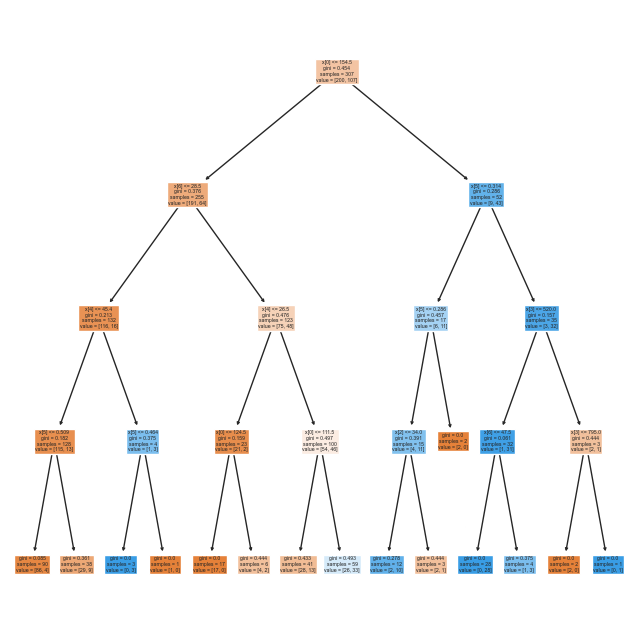

In [286]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
tree.plot_tree(model, filled=True)
plt.show()

fig.savefig('tree_decision.jpg')

In [287]:
y_pred =model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [288]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

confusion_matriz = confusion_matrix(y_test, y_pred)
confusion_matriz

array([[252,  48],
       [ 57, 104]])

<Axes: >

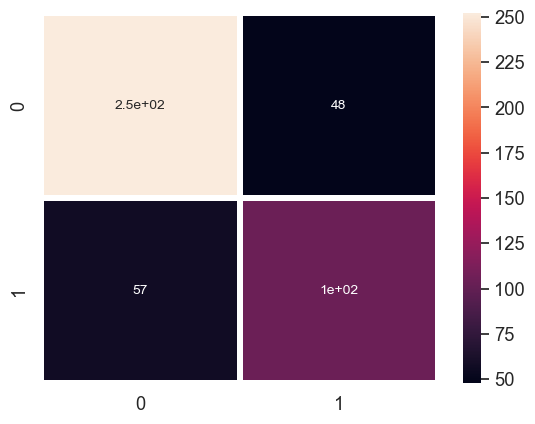

In [293]:
sn.set(font_scale=1.2)
sn.heatmap(confusion_matriz, annot=True, annot_kws={"size": 10}, linewidths=3)

In [290]:
accuracy = np.sum(confusion_matriz.diagonal()) / np.sum(confusion_matriz)
print("El modelo tiene un accuracy de : ", accuracy) 

El modelo tiene un accuracy de :  0.7722342733188721
